<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U26T1FujiDownhillProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PROBLEMAS EN EL DESCENSO DEL MONTE FUJI
  SOBRE EL TEXTO
    PROPOSITO DEL TEXTO
      Familiarícese con la biblioteca matemática NumPy
      Entendiendo cómo funciona el descenso de gradiente
    COMO APRENDER
      Aprenderá los elementos básicos del aprendizaje automático mediante la creación de un programa que utiliza el descenso de gradiente para resolver un problema análogo al descenso de una montaña.

  PROBLEMA AL DESCENDER DEL MONTE FUJI (FUJI SHIMOYAMA)
    El descenso de gradiente se puede comparar con el descenso de una montaña o un valle.
    Aprenderemos el descenso de gradiente creando un programa para descender desde el monte Fuji, con los datos de elevación del monte Fuji como la función objetivo que queremos minimizar .

  DESCENDIENDO DEL MONTE FUJI
    OBTENCION DE LOS DATOS DE ELEVACION
       Acceder a : https://docbase.io/posts/1976815/sharing/f673eef0-e7f3-4655-b32b-716b380e9340 e introducir 1632

       De izquierda a derecha, se muestran el "número de punto", la "latitud", la "longitud", la "altitud" y la "distancia desde el punto 0". Las unidades de altitud y distancia son metros. Estos son datos para 300 puntos.
'''

In [2]:
#VISUALIZAR EL DATASET
import numpy as np

csv_path = "mtfuji_data.csv" #Especifique el nombre del archivo (ruta)

np.set_printoptions(suppress=True) #Prohibir la notación exponencial
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[120: 125])

[[  120.          35.335749   138.78559   1598.36     38666.      ]
 [  121.          35.337425   138.782695  1659.43     38988.      ]
 [  122.          35.339101   138.7798    1726.5      39310.      ]
 [  123.          35.340777   138.776905  1781.98     39632.      ]
 [  124.          35.342452   138.77401   1850.02     39955.      ]]


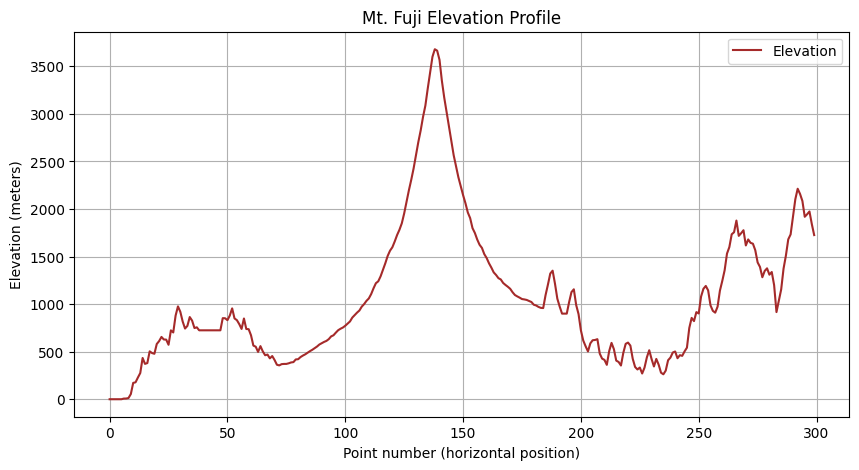

In [4]:
'''
PROBLEMA 1 - VISUALIZACION DE DATOS
  Utilice Matplotlib para visualizar los datos de elevación.
  Al establecer el número de punto en el eje horizontal y la elevación en el vertical,
  puede dibujar una sección transversal del monte Fuji.
'''
import numpy as np
import matplotlib.pyplot as plt

# Load the elevation data of Mt. Fuji
# The file "mtfuji_data.csv" must be in the same folder
elevation_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)

# Get the elevation values from the second column (index 1)
elevation = elevation_data[:, 3]

# Create an array for the horizontal axis (point numbers)
points = np.arange(len(elevation))

# Plot the elevation profile of Mt. Fuji
plt.figure(figsize=(10, 5))
plt.plot(points, elevation, color='brown', label='Elevation')
plt.title("Mt. Fuji Elevation Profile")
plt.xlabel("Point number (horizontal position)")
plt.ylabel("Elevation (meters)")
plt.grid(True)
plt.legend()
plt.show()

In [2]:
'''
PROBLEMA 2 - CREA UNA FUNCION PARA CALCULAR EL GRADIENTE EN UN PUNTO DETERMINADO
  En "Matrices bidimensionales y problemas de gradiente", primero calculamos el gradiente en cada punto.
  Sin embargo, si imaginas el Monte Fuji en la oscuridad, solo puedes conocer el gradiente en tu punto actual.

  Crea una función que calcule el gradiente en función de la relación entre el "número del punto actual" y el "número del punto junto a usted (el número del punto actual - 1)".

  La pendiente se calculó utilizando la siguiente fórmula, donde y es la elevación y x es el número de punto.
      Gradient = (y2 - y1) / (x2 - x1)
'''
import numpy as np

# Load the elevation data of Mt. Fuji
elevation_data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)

# Get the elevation values from the second column
elevation = elevation_data[:, 1]

# Define a function to calculate the gradient at a specific point
def calculate_gradient(point_index):
    """
    This function calculates the gradient (slope) at a given point on Mt. Fuji
    using the elevation difference between the current point and the previous one.
    """
    # Make sure the point index is valid (not the first point)
    if point_index == 0:
        print("No previous point to compare. Gradient cannot be calculated.")
        return None

    # Get the elevation at the current point (y2) and the previous point (y1)
    y2 = elevation[point_index]
    y1 = elevation[point_index - 1]

    # Get the x values (point numbers). The distance between two points is 1.
    x2 = point_index
    x1 = point_index - 1

    # Calculate the gradient using the formula: (y2 - y1) / (x2 - x1)
    gradient = (y2 - y1) / (x2 - x1)

    return gradient

# Example: Calculate the gradient at point 100
point = 100
slope = calculate_gradient(point)
print(f"The gradient at point {point} is {slope}")

The gradient at point 100 is 0.0016780000000053974


In [14]:
'''
PROBLEMA 3 - CREAR UNA FUNCION PARA CALCULAR EL PUNTO DE DESTINO
  Crea una función que calcule el próximo punto de destino "P_d" basándose en la información de gradiente del punto actual "G_pa".
  Expresado matemáticamente, esto se puede expresar como "P_d = P_a - α × G_pa".
  Para el "G_pa", utilice el valor de retorno de la función creada en el Problema 2. "α" es un hiperparámetro que puede tomar cualquier valor mayor que 0. En el aprendizaje automático "AL", esto se denomina tasa de aprendizaje "LR". La forma en que el gradiente desciende cambia según este valor. Por ejemplo, configúrelo en 0,2.

  <<Notas sobre la implementación>>
    Al calcular la fórmula anterior, el punto de destino tendrá un número de coma flotante, pero para obtener la información del gradiente en esta ocasión, el punto debe expresarse como un entero. Por lo tanto, la conversión se realiza mediante redondeo. Además, es necesario gestionar los casos en los que el valor no es posible. Por ejemplo, si el punto de destino es negativo, no se podrá obtener el gradiente la próxima vez porque no existen dichos datos. Considerar errores y expcepciones al momento de implementar

  ¿Qué son los hiperparámetros?
    En los métodos de "AL", los hiperparámetros son valores que el método por sí solo no puede optimizar. El comportamiento del método cambia en función de este valor y afecta al éxito del aprendizaje, por lo que deben configurarse con cuidado. La forma más sencilla es que una persona los configure, pero también existen métodos para determinarlos mecánicamente.
'''
import numpy as np

# Function to calculate the gradient at a given point
def calculate_gradient(elevation_data, current_point):
    # Check if the current point is valid
    if current_point <= 0 or current_point >= len(elevation_data):
        raise ValueError("Invalid point for gradient calculation")

    # Get the current elevation and the previous elevation
    y2 = elevation_data[current_point]
    y1 = elevation_data[current_point - 1]

    # x2 and x1 are just the indices
    x2 = current_point
    x1 = current_point - 1

    # Calculate the gradient using the formula
    gradient = (y2 - y1) / (x2 - x1)
    return gradient

# Function to calculate the next destination point
def get_next_point(elevation_data, current_point, learning_rate=0.2):
    try:
        # Calculate the gradient at the current point
        gradient = calculate_gradient(elevation_data, current_point)

        # Calculate the destination point
        next_point = current_point - learning_rate * gradient

        # Round to nearest integer since we work with indices
        next_point = int(round(next_point))

        # Check if the next point is within valid range
        if next_point < 0:
            next_point = 0
        elif next_point >= len(elevation_data):
            next_point = len(elevation_data) - 1

        return next_point
    except Exception as e:
        print("Error:", e)
        return current_point  # Stay at current point if error occurs

# Example usage with fake data (for testing purposes)
dataset = np.loadtxt('mtfuji_data.csv', delimiter=',', skiprows=1)
elevation_data = dataset[:, 3]
current_p = 136
next_p = get_next_point(elevation_data, current_p)
print("Current point: ", current_p)
print("Next point:", next_p)

Current point:  136
Next point: 102


In [2]:
'''
PREGUNTA 4 - CREA UNA FUNCION PARA BAJAR UNA MONTAÑA
  Crea una función para bajar la montaña.
  Recibe la ubicación inicial y la actualiza usando la función del problema 3.
  Registra la ubicación de cada movimiento en una lista o similar y úsala como valor de retorno de la función.
  La primera "ubicación actual" está cerca de la cima del monte Fuji, punto 136 (altitud 3434,59 m).
  Empecemos bajando desde aquí.

  <<Notas sobre la implementación>>
  Debido al redondeo del problema 3, el punto de destino podría coincidir con el punto actual.
  Esto significa que la distancia recorrida ha disminuido, por lo que se puede asumir que se ha llegado al pie de la montaña.
  Esto no ocurre en un descenso de gradiente real.

'''
import numpy as np

# Function to calculate the gradient between two points
def calculate_gradient(y, x_current):
    if x_current <= 0:
        return 0  # Cannot calculate gradient at the first point
    x1 = x_current - 1
    x2 = x_current
    y1 = y[x1]
    y2 = y[x2]
    gradient = (y2 - y1) / (x2 - x1)
    return gradient

# Function to calculate the next destination point
def calculate_next_point(y, current_point, learning_rate=0.2):
    gradient = calculate_gradient(y, current_point)
    next_point = current_point - learning_rate * gradient
    next_point = int(round(next_point))

    # Make sure the next point is within valid range
    if next_point < 0 or next_point >= len(y):
        return current_point  # Stay at the current point if next point is invalid

    return next_point

# Function to go down the mountain
def descend_mountain(y, start_point, learning_rate=0.2):
    path = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_next_point(y, current_point, learning_rate)

        # If the next point is the same as the current, we are at the bottom
        if next_point == current_point:
            break

        path.append(next_point)
        current_point = next_point

    return path

# Example elevation data (simulate Mount Fuji)
# For testing purposes only — in real problems, load real data
dataset = np.loadtxt('mtfuji_data.csv', delimiter=',', skiprows=1)      # Assuming elevation is in column 2
y = dataset[:, 3]

# Start descending from point 136
initial_point = 136
learning_rate = 0.1
mountain_path = descend_mountain(y, initial_point, learning_rate)

# Print the path taken
print("Path taken down the mountain:", mountain_path)

Path taken down the mountain: [136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


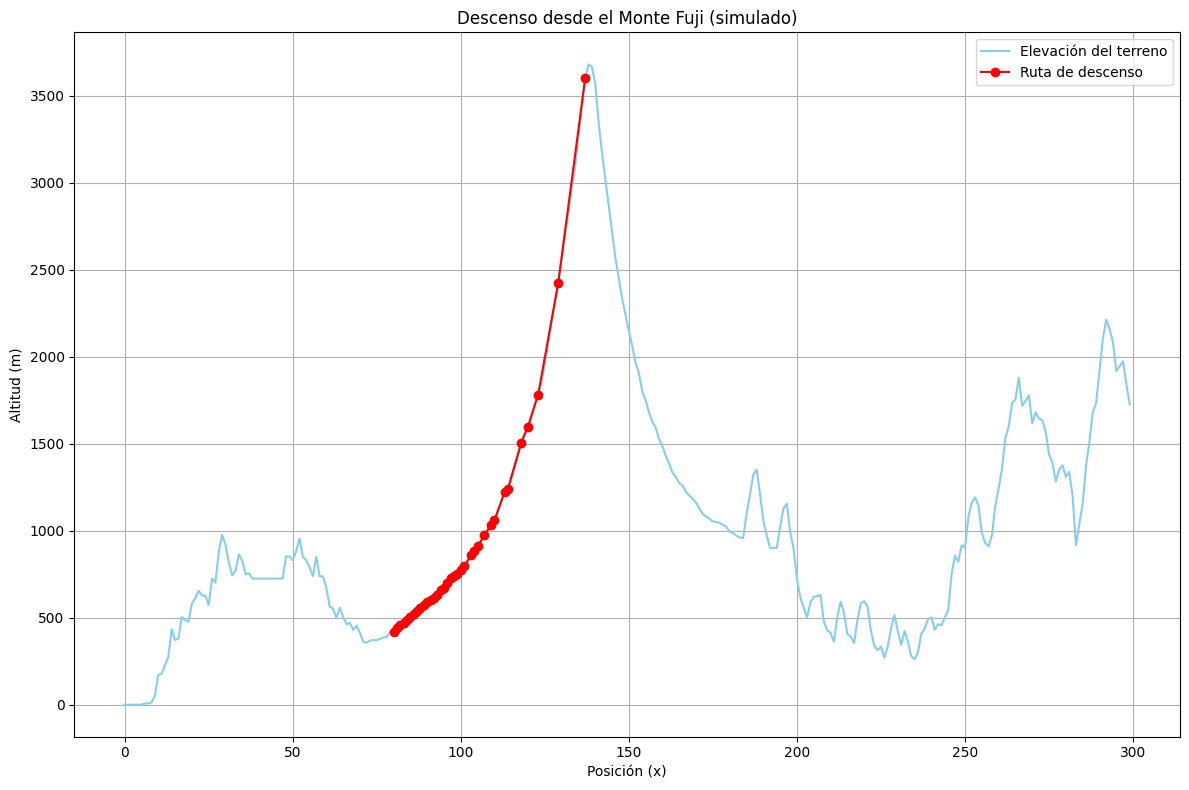

In [18]:
'''
PROBLEMA 5 - VISUALIZACION DEL PROCESO DE DESCENSO
  Visualice el proceso de descenso en el problema 4 usando Matplotlib.

  《Ejemplo de visualización》

  Mostrar el punto movido como un punto en la sección transversal
  Crea un gráfico lineal de la elevación y la pendiente para cada iteración.
'''
import numpy as np
import matplotlib.pyplot as plt

# ---------- Funciones del problema anterior ----------

def calculate_gradient(y, x_current):
    if x_current <= 0:
        return 0
    x1 = x_current - 1
    x2 = x_current
    y1 = y[x1]
    y2 = y[x2]
    gradient = (y2 - y1) / (x2 - x1)
    return gradient

def calculate_next_point(y, current_point, learning_rate=0.2):
    gradient = calculate_gradient(y, current_point)
    next_point = current_point - learning_rate * gradient
    next_point = int(round(next_point))
    if next_point < 0 or next_point >= len(y):
        return current_point
    return next_point

def descend_mountain(y, start_point=136, learning_rate=0.2):
    path = [start_point]
    current_point = start_point
    while True:
        next_point = calculate_next_point(y, current_point, learning_rate)
        if next_point == current_point:
            break
        path.append(next_point)
        current_point = next_point
    return path

# ---------- Datos simulados (en caso de no tener el CSV real) ----------
# Si tienes un archivo CSV, reemplaza esto por:
y = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1, usecols=3)
x = np.arange(0, 300)

# ---------- Proceso de descenso ----------
path = descend_mountain(y, start_point=137, learning_rate=0.05)

# ---------- Cálculo del gradiente en cada punto del descenso ----------
gradients = [calculate_gradient(y, x_point) for x_point in path]

# ---------- Visualización ----------
fig, axs = plt.subplots(1, 1, figsize=(12, 8), sharex=True)

# Subplot 1: Elevación + puntos de descenso
axs.plot(x, y, label="Elevación del terreno", color="skyblue")
axs.plot(path, y[path], 'ro-', label="Ruta de descenso")
axs.set_xlabel("Posición (x)")
axs.set_ylabel("Altitud (m)")
axs.set_title("Descenso desde el Monte Fuji (simulado)")
axs.legend()
axs.grid(True)

plt.tight_layout()
plt.show()

In [28]:
'''
PROBLEMA 6 - CAMBIAR EL VALOR INICIAL
  En el problema 4, el punto actual inicial se fijó en 136, pero calcule esto para todos los demás puntos.
  En concreto, necesita poder cambiar el punto actual.
'''
import numpy as np
import matplotlib.pyplot as plt

# Load elevation data
elevation = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1, usecols=3)

# Function to calculate the gradient at a given point
def calculate_gradient(elevation, point):
    if point <= 0:
        return elevation[point] - elevation[point + 1]
    elif point >= len(elevation) - 1:
        return elevation[point] - elevation[point - 1]
    else:
        return (elevation[point + 1] - elevation[point - 1]) / 2

# Function to calculate next point using gradient descent
def get_next_point(current_point, learning_rate):
    gradient = calculate_gradient(elevation, current_point)
    next_point = current_point - learning_rate * gradient
    next_point = int(round(next_point))

    # Check if the point is within valid range
    if next_point < 0:
        next_point = 0
    elif next_point >= len(elevation):
        next_point = len(elevation) - 1

    return next_point

# Function to perform the full descent from any starting point
def descend_mountain(start_point, learning_rate=0.1):
    points = [start_point]
    current_point = start_point

    while True:
        next_point = get_next_point(current_point, learning_rate)
        if next_point == current_point:
            break
        points.append(next_point)
        current_point = next_point

    return points

# Change the starting point here
start_point = 140
path = descend_mountain(start_point)
elevations = elevation[path]

# Plot the results
print("Elevations array: ", elevations)
print("Path array", path)

Elevations array:  [3567.76 1679.25 1384.07 1222.48 1160.85 1081.07 1068.05 1053.28 1049.33]
Path array [140, 156, 162, 167, 170, 173, 174, 175, 176]


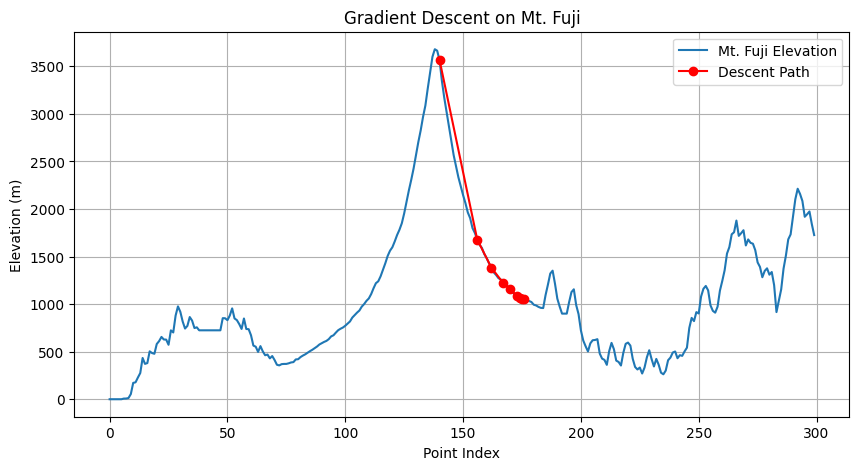

In [30]:
'''
PROBLEMA 7 - VISUALIZACION DEL PROCESO DE DESCENSO PARA CADA VALOR INICIAL
  En el problema 6, calculamos el proceso de descenso para todos los valores iniciales.
  Ahora, visualice el proceso de descenso para varios valores iniciales, como en el problema 5.
  Puede observar que los valores iniciales afectan los resultados del descenso de gradiente.

¿Cual es el valor inicial?
  El valor, como el primer punto de este ejemplo, se denomina valor inicial.
  Al modificarlo, se modificará el resultado.
  Por ejemplo, 136 y 142 descenderán por diferentes laderas del monte Fuji.
'''
import numpy as np
import matplotlib.pyplot as plt

# Load elevation data
elevation = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1, usecols=3)

# Function to calculate the gradient at a given point
def calculate_gradient(elevation, point):
    if point <= 0:
        return elevation[point] - elevation[point + 1]
    elif point >= len(elevation) - 1:
        return elevation[point] - elevation[point - 1]
    else:
        return (elevation[point + 1] - elevation[point - 1]) / 2

# Function to calculate next point using gradient descent
def get_next_point(current_point, learning_rate):
    gradient = calculate_gradient(elevation, current_point)
    next_point = current_point - learning_rate * gradient
    next_point = int(round(next_point))

    # Check if the point is within valid range
    if next_point < 0:
        next_point = 0
    elif next_point >= len(elevation):
        next_point = len(elevation) - 1

    return next_point

# Function to perform the full descent from any starting point
def descend_mountain(start_point, learning_rate=0.1):
    points = [start_point]
    current_point = start_point

    while True:
        next_point = get_next_point(current_point, learning_rate)
        if next_point == current_point:
            break
        points.append(next_point)
        current_point = next_point

    return points

# Function to plot descent process
def plot_descent(elevation, path):
    plt.figure(figsize=(10, 5))
    plt.plot(elevation, label="Mt. Fuji Elevation")
    plt.plot(path, elevation[path], "ro-", label="Descent Path")
    plt.xlabel("Point Index")
    plt.ylabel("Elevation (m)")
    plt.title("Gradient Descent on Mt. Fuji")
    plt.legend()
    plt.grid(True)
    plt.show()

# Change the starting point here
start_point = 140  #can change this value to test different starting positions
path = descend_mountain(start_point)
plot_descent(elevation, path)

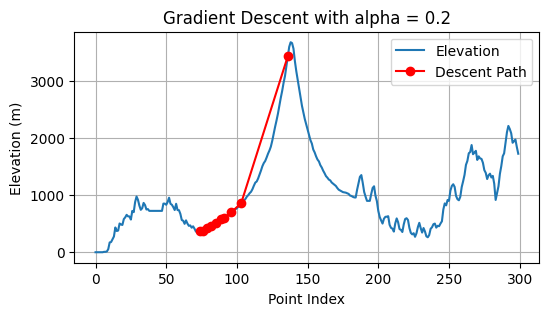

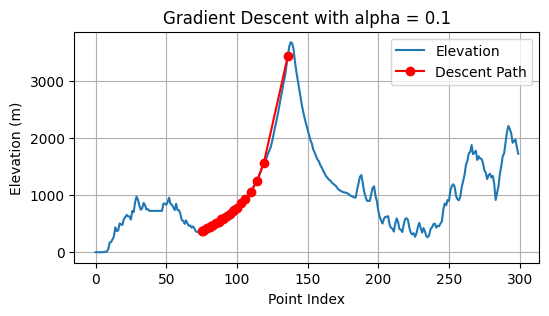

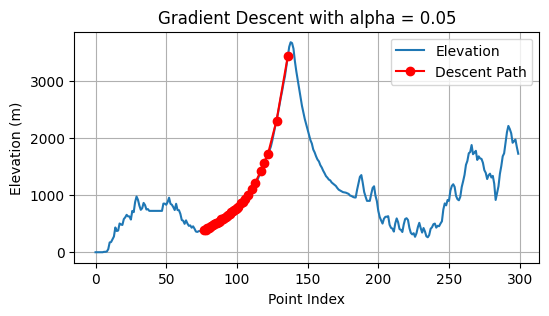

In [35]:
'''
PROBLEMA 8 - CAMBIO DE HIPERPARAMETROS (PROBLEMA AVANZADO)
  Visualice el proceso de descenso como se muestra en el Problema 5, modificando el hiperparámetro "alpha".
  Luego, confirme que los resultados varían significativamente según el hiperparámetro.
'''
import numpy as np
import matplotlib.pyplot as plt

# Load the elevation data of Mt. Fuji
elevation = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1, usecols=3)

# Function to calculate the gradient at a given point
def calculate_gradient(elevation, point):
    if point <= 0:
        return elevation[point] - elevation[point + 1]
    elif point >= len(elevation) - 1:
        return elevation[point] - elevation[point - 1]
    else:
        return (elevation[point + 1] - elevation[point - 1]) / 2

# Function to perform gradient descent from a starting point with a given alpha
def gradient_descent(start_point, alpha):
    path = [start_point]
    current_point = start_point

    while True:
        grad = calculate_gradient(elevation, current_point)
        next_point = current_point - alpha * grad
        next_point = int(round(next_point))

        # Clamp the point within valid range
        if next_point < 0:
            next_point = 0
        elif next_point >= len(elevation):
            next_point = len(elevation) - 1

        if next_point == current_point:
            break

        path.append(next_point)
        current_point = next_point

    return path

# Function to visualize the descent path
def plot_descent(elevation, path, alpha):
    plt.figure(figsize=(6, 3))
    plt.plot(elevation, label="Elevation")
    plt.plot(path, elevation[path], "ro-", label="Descent Path")
    plt.title(f"Gradient Descent with alpha = {alpha}")
    plt.xlabel("Point Index")
    plt.ylabel("Elevation (m)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Try different values of alpha
alpha_values = [0.2, 0.1, 0.05]
start_point = 136

# Loop through each alpha and visualize the result
for alpha in alpha_values:
    path = gradient_descent(start_point, alpha)
    plot_descent(elevation, path, alpha)